# Climate Data Analysis: Understanding Earth's Temperature Record

## Learning Objectives
By completing this tutorial, you will:
- Master climate data analysis using fundamental statistical methods
- Apply linear regression techniques to quantify global warming trends  
- Understand the mathematical foundations of climate signal detection
- Create publication-quality visualizations for climate research
- Work with real climate datasets and modern analysis techniques

## Prerequisites
- Basic Python programming
- Introductory statistics (mean, standard deviation, regression)
- Basic understanding of data visualization



## Scientific Context: The Mathematics of Climate Change

Climate science relies on statistical analysis of temperature records, pioneered by scientists including:

- **Joseph Fourier (1824)**: First proposed the greenhouse effect mechanism
- **Svante Arrhenius (1896)**: Calculated CO₂ impact on global temperature (Nobel Prize Chemistry 1903)
- **Guy Stewart Callendar (1938)**: First statistical analysis demonstrating 20th-century warming
- **Klaus Hasselmann (2021)**: Nobel Prize Physics for climate modeling framework

### Mathematical Foundation: Temperature Anomalies

Climate scientists use temperature anomalies rather than absolute temperatures:

$$\Delta T(t) = T(t) - T_{\text{baseline}}$$

where $T_{\text{baseline}}$ is typically a 30-year average (e.g., 1951-1980 or 1991-2020).

This approach removes seasonal and geographic biases, allowing global patterns to emerge clearly.

In [1]:
# Import required libraries for climate analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style for publication-quality figures
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Set random seed for reproducibility
np.random.seed(42)

print("Climate Analysis Environment Ready!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Climate Analysis Environment Ready!
NumPy version: 2.2.6
Pandas version: 2.3.1


## Mathematical Decomposition of Climate Signals

Following the framework established by Klaus Hasselmann (Nobel Prize Physics 2021), we decompose global temperature into mathematically distinct components:

$$T(t) = T_0 + T_{\text{natural}}(t) + T_{\text{anthropogenic}}(t) + T_{\text{stochastic}}(t)$$

### Natural Climate Variability Components

**1. Solar Cycle Component** (Heinrich Schwabe, 1843):
$$T_{\text{solar}}(t) = A_{\text{solar}} \sin\left(\frac{2\pi t}{11.1}\right)$$

where $A_{\text{solar}} \approx 0.1°C$ and period is 11.1 years.

**2. El Niño-Southern Oscillation (ENSO)** (Gilbert Walker, 1924):
$$T_{\text{ENSO}}(t) = A_{\text{ENSO}} \sin\left(\frac{2\pi t}{3.5} + \phi(t)\right)$$

where $A_{\text{ENSO}} \approx 0.15°C$ and period varies between 2-7 years.

**3. Volcanic Forcing** (temporary cooling events):
$$T_{\text{volcanic}}(t) = -A_{\text{volcanic}} e^{-(t-t_{\text{eruption}})/\tau}$$

where $\tau \approx 1-2$ years is the recovery timescale.

In [2]:
# Generate synthetic climate data using physically-based model
years = np.arange(1880, 2025)
n_years = len(years)

# Baseline temperature (pre-industrial reference)
T_baseline = -0.2  # °C relative to 1951-1980 mean

print(f"Setting up climate model for {n_years} years (1880-2024)")
print(f"Baseline temperature: {T_baseline}°C")

Setting up climate model for 145 years (1880-2024)
Baseline temperature: -0.2°C


In [3]:
# Natural variability component 1: Solar cycle
A_solar = 0.1  # Solar cycle amplitude (°C)
solar_period = 11.1  # years
T_solar = A_solar * np.sin(2 * np.pi * years / solar_period)

# Natural variability component 2: ENSO with irregular amplitude
A_ENSO = 0.15  # ENSO amplitude (°C)
enso_period = 3.5  # average period (years)
enso_phase = 2 * np.pi * years / enso_period
# Add realistic variability to ENSO amplitude
enso_modulation = np.abs(np.random.normal(1, 0.3, n_years))
T_ENSO = A_ENSO * np.sin(enso_phase) * enso_modulation

# Natural variability component 3: Volcanic events (example events)
T_volcanic = np.zeros(n_years)
volcanic_events = [
    (1883, -0.3, "Krakatoa"),
    (1963, -0.2, "Agung"),
    (1982, -0.25, "El Chichón"),
    (1991, -0.4, "Pinatubo")
]

for year_event, amplitude, name in volcanic_events:
    if year_event >= 1880:
        idx = year_event - 1880
        if idx < n_years:
            # Exponential decay with 2-year timescale
            for j in range(idx, min(idx + 10, n_years)):
                T_volcanic[j] += amplitude * np.exp(-(j - idx) / 2)

print(f"Natural variability components:")
print(f"  Solar cycle: ±{A_solar}°C (period: {solar_period} years)")
print(f"  ENSO: ±{A_ENSO}°C (period: ~{enso_period} years)")
print(f"  Volcanic events: {len(volcanic_events)} major eruptions included")

Natural variability components:
  Solar cycle: ±0.1°C (period: 11.1 years)
  ENSO: ±0.15°C (period: ~3.5 years)
  Volcanic events: 4 major eruptions included


In [4]:
# Anthropogenic forcing: Multi-regime model based on historical emissions

# Period 1: Pre-industrial to early industrial (1880-1950)
early_rate = 0.003  # °C/year

# Period 2: Post-war industrialization (1950-1980)
mid_rate = 0.008  # °C/year

# Period 3: Modern acceleration (1980-present)
modern_rate = 0.018  # °C/year

T_anthropogenic = np.zeros(n_years)
for i, year in enumerate(years):
    if year < 1950:
        T_anthropogenic[i] = early_rate * (year - 1880)
    elif year < 1980:
        T_anthropogenic[i] = early_rate * (1950 - 1880) + mid_rate * (year - 1950)
    else:
        T_anthropogenic[i] = (early_rate * (1950 - 1880) + 
                              mid_rate * (1980 - 1950) + 
                              modern_rate * (year - 1980))

print(f"Anthropogenic warming rates:")
print(f"  1880-1950: {early_rate*10:.2f}°C/decade")
print(f"  1950-1980: {mid_rate*10:.2f}°C/decade") 
print(f"  1980-present: {modern_rate*10:.2f}°C/decade")

Anthropogenic warming rates:
  1880-1950: 0.03°C/decade
  1950-1980: 0.08°C/decade
  1980-present: 0.18°C/decade


In [5]:
# Stochastic variability (weather noise)
sigma_stochastic = 0.1  # Standard deviation of random variability
T_stochastic = np.random.normal(0, sigma_stochastic, n_years)

# Apply smoothing to make it more realistic (red noise)
from scipy.ndimage import gaussian_filter1d
T_stochastic = gaussian_filter1d(T_stochastic, sigma=1)

# Total temperature combining all components
T_total = T_baseline + T_solar + T_ENSO + T_volcanic + T_anthropogenic + T_stochastic

print(f"\nTemperature summary:")
print(f"  1880 temperature: {T_total[0]:.2f}°C")
print(f"  2024 temperature: {T_total[-1]:.2f}°C")
print(f"  Total warming (1880-2024): {T_total[-1] - T_total[0]:.2f}°C")


Temperature summary:
  1880 temperature: 0.01°C
  2024 temperature: 1.26°C
  Total warming (1880-2024): 1.24°C


In [6]:
# Create comprehensive DataFrame
climate_data = pd.DataFrame({
    'Year': years,
    'Temperature_Anomaly': T_total,
    'Solar_Cycle': T_solar,
    'ENSO_Effect': T_ENSO,
    'Volcanic_Effect': T_volcanic,
    'Anthropogenic_Warming': T_anthropogenic,
    'Natural_Variability': T_stochastic,
    'Decade': (years // 10) * 10
})

# Add 5-year moving average for smoothed trend
climate_data['Temperature_5yr_avg'] = climate_data['Temperature_Anomaly'].rolling(window=5, center=True).mean()

print(f"Climate dataset created: {len(climate_data)} years of data")
print("\nFirst 5 years:")
print(climate_data[['Year', 'Temperature_Anomaly', 'Anthropogenic_Warming']].head())

Climate dataset created: 145 years of data

First 5 years:
   Year  Temperature_Anomaly  Anthropogenic_Warming
0  1880             0.013945                  0.000
1  1881            -0.165192                  0.003
2  1882            -0.462997                  0.006
3  1883            -0.576674                  0.009
4  1884            -0.308739                  0.012


## Visualizing Climate Trends

Create publication-quality visualizations to understand climate patterns and trends.

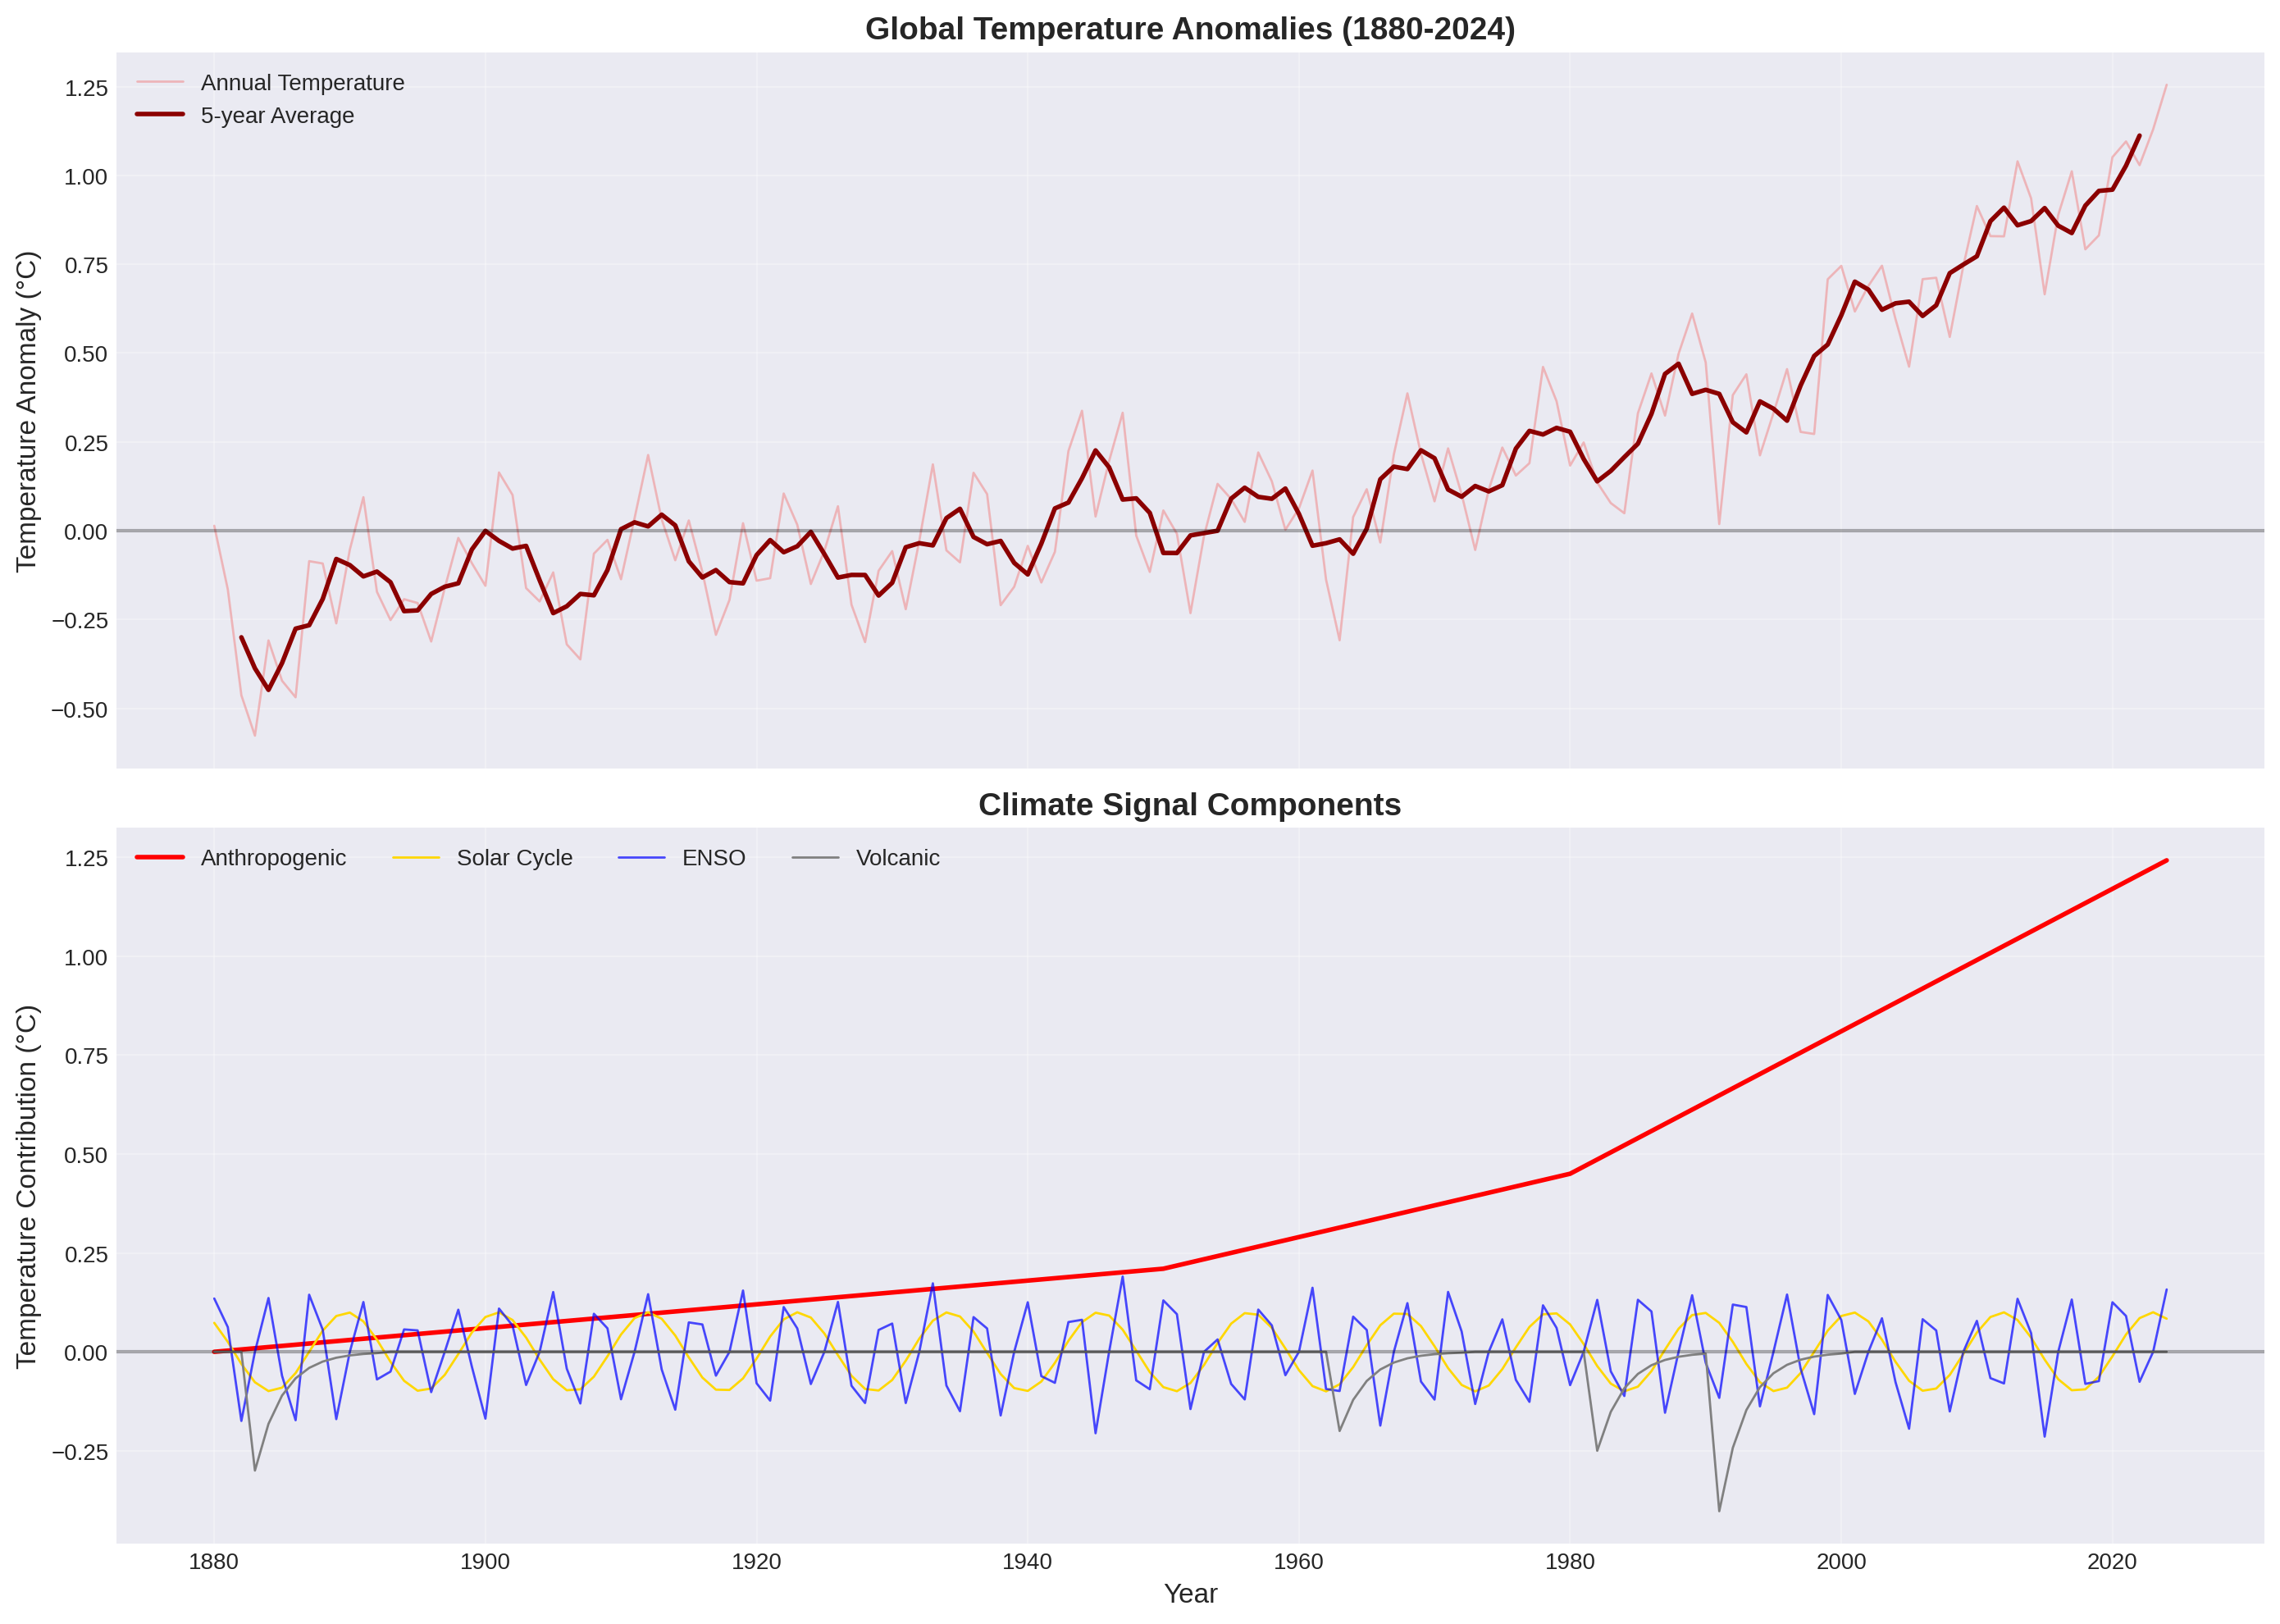

In [7]:
# Create comprehensive temperature time series plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Top panel: Temperature anomaly with components
ax1.plot(climate_data['Year'], climate_data['Temperature_Anomaly'],
         color='lightcoral', alpha=0.5, linewidth=1, label='Annual Temperature')
ax1.plot(climate_data['Year'], climate_data['Temperature_5yr_avg'],
         color='darkred', linewidth=2, label='5-year Average')

# Add zero line
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax1.set_ylabel('Temperature Anomaly (°C)', fontsize=12)
ax1.set_title('Global Temperature Anomalies (1880-2024)', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Bottom panel: Component breakdown
ax2.plot(climate_data['Year'], climate_data['Anthropogenic_Warming'],
         color='red', linewidth=2, label='Anthropogenic')
ax2.plot(climate_data['Year'], climate_data['Solar_Cycle'],
         color='gold', linewidth=1, label='Solar Cycle')
ax2.plot(climate_data['Year'], climate_data['ENSO_Effect'],
         color='blue', linewidth=1, alpha=0.7, label='ENSO')
ax2.plot(climate_data['Year'], climate_data['Volcanic_Effect'],
         color='gray', linewidth=1, label='Volcanic')

ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Temperature Contribution (°C)', fontsize=12)
ax2.set_title('Climate Signal Components', fontsize=14, fontweight='bold')
ax2.legend(loc='upper left', ncol=4)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# Statistical trend analysis for different periods
def calculate_trend(data, start_year, end_year):
    """Calculate linear trend for specified period"""
    mask = (data['Year'] >= start_year) & (data['Year'] <= end_year)
    subset = data[mask]
    
    if len(subset) > 1:
        # Linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(
            subset['Year'], subset['Temperature_Anomaly']
        )
        return slope * 10, r_value**2, p_value  # Convert to per decade
    return None, None, None

# Calculate trends for different periods
periods = [
    (1880, 1950, "Pre-1950"),
    (1950, 1980, "1950-1980"),
    (1980, 2024, "1980-2024"),
    (1880, 2024, "Full Period")
]

print("Temperature Trend Analysis")
print("="*60)
print(f"{'Period':<15} {'Trend (°C/decade)':<20} {'R²':<10} {'P-value':<10}")
print("-"*60)

for start, end, label in periods:
    trend, r2, p_val = calculate_trend(climate_data, start, end)
    if trend is not None:
        significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
        print(f"{label:<15} {trend:+.3f}{significance:<17} {r2:.3f}      {p_val:.2e}")

print("\nSignificance: *** p<0.001, ** p<0.01, * p<0.05")

Temperature Trend Analysis
Period          Trend (°C/decade)    R²         P-value   
------------------------------------------------------------
Pre-1950        +0.044***               0.250      9.09e-06
1950-1980       +0.092**                0.261      3.31e-03
1980-2024       +0.217***               0.798      1.62e-16
Full Period     +0.077***               0.714      1.06e-40

Significance: *** p<0.001, ** p<0.01, * p<0.05


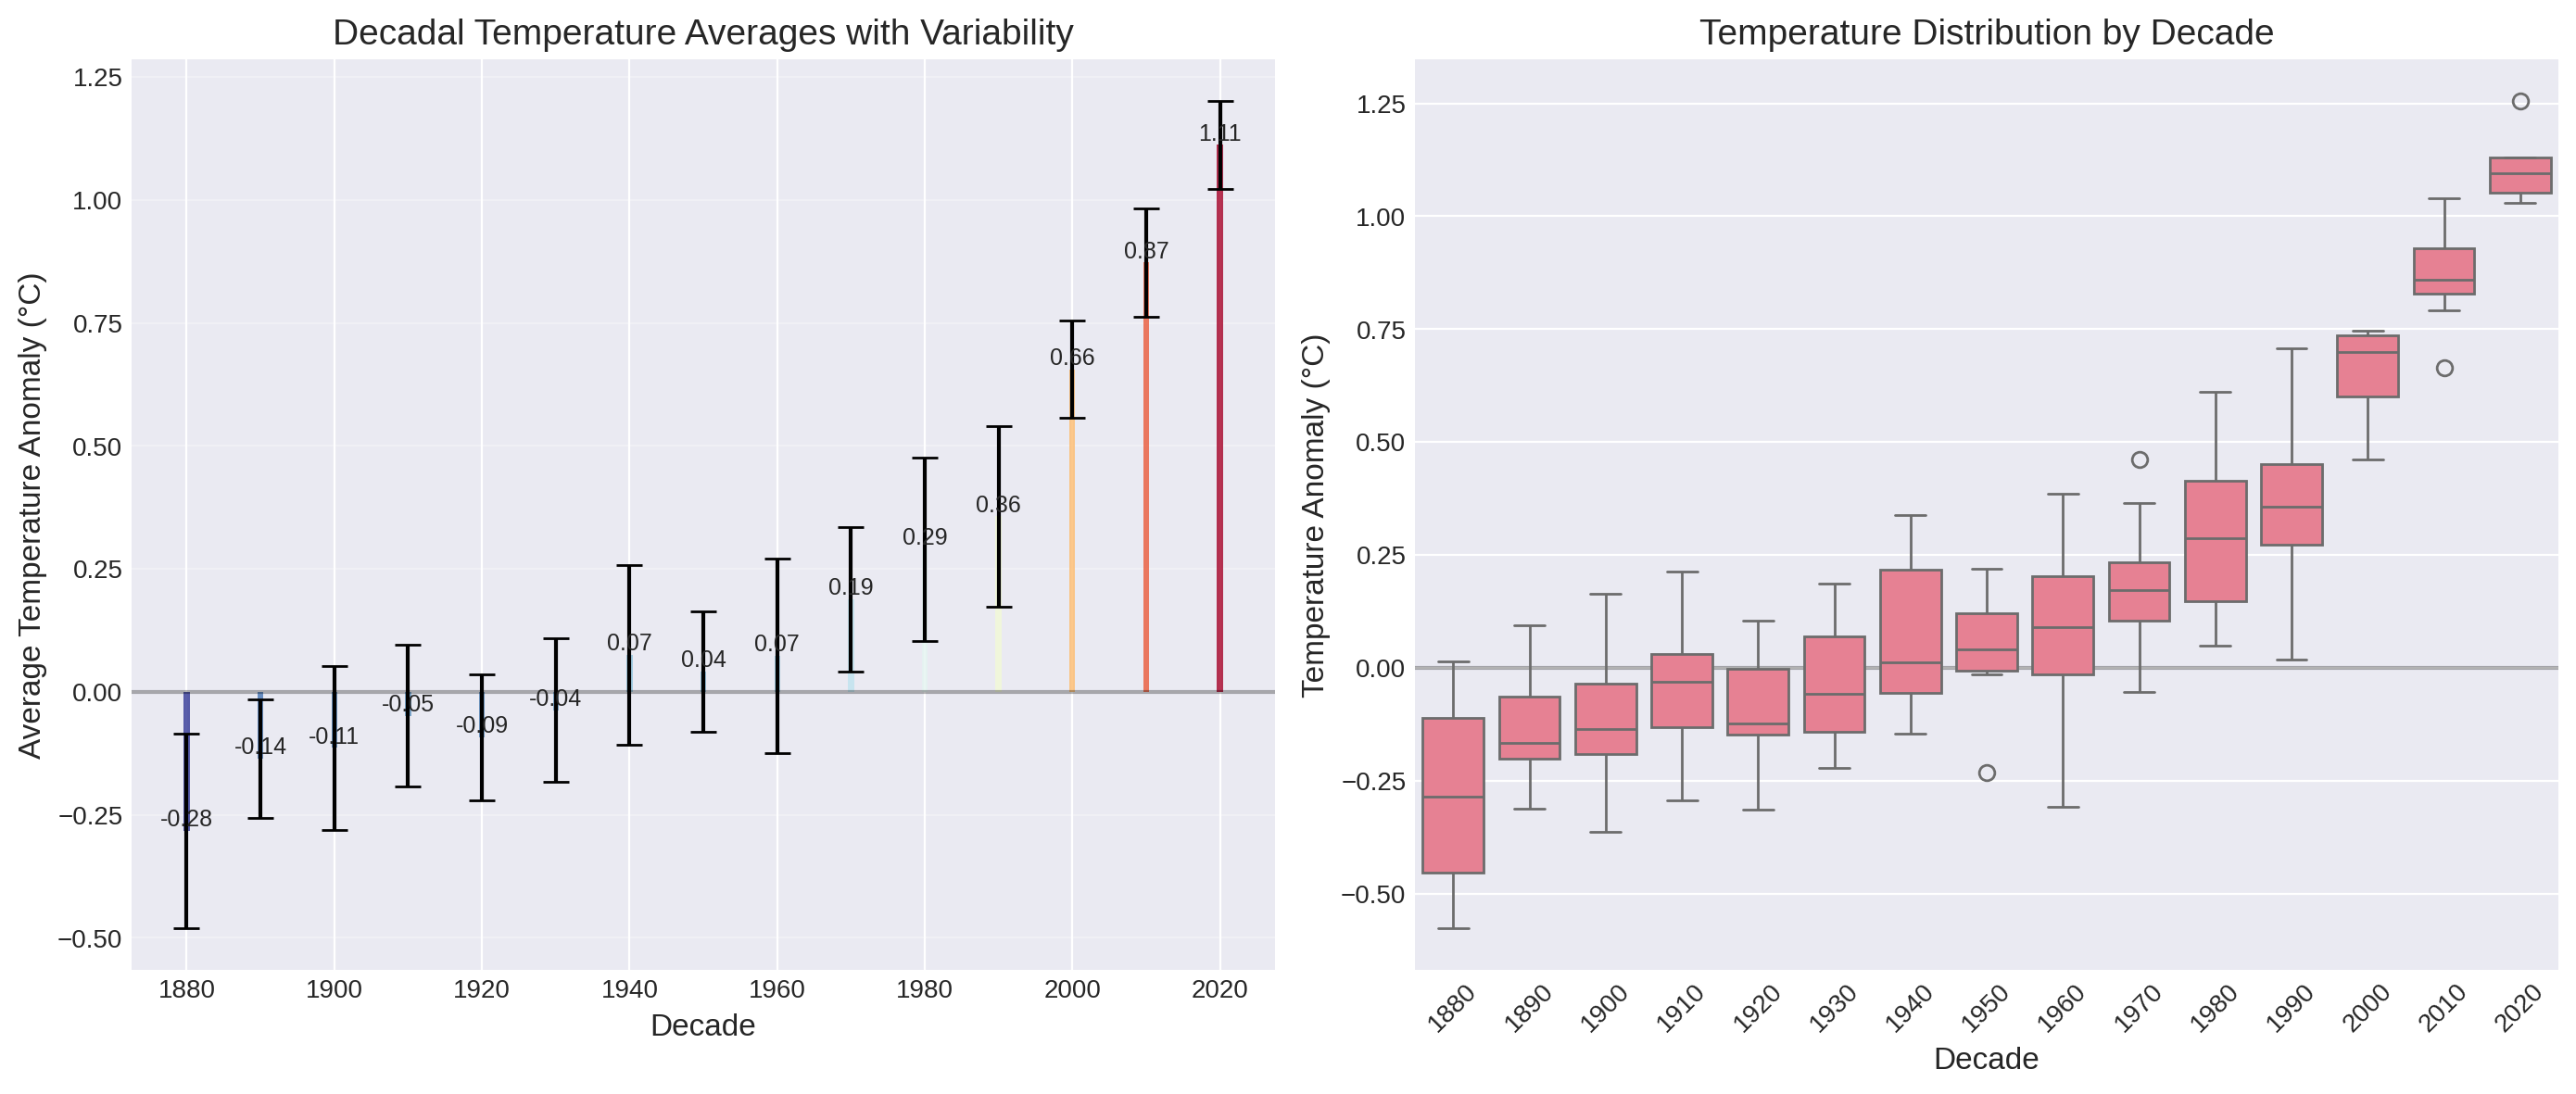


Decadal Statistics:
 Decade  Temperature_Anomaly_mean  Temperature_Anomaly_std
   1880                    -0.283                    0.198
   1890                    -0.136                    0.120
   1900                    -0.114                    0.166
   1910                    -0.049                    0.144
   1920                    -0.092                    0.128
   1930                    -0.037                    0.146
   1940                     0.075                    0.182
   1950                     0.041                    0.122
   1960                     0.073                    0.198
   1970                     0.188                    0.146
   1980                     0.290                    0.186
   1990                     0.357                    0.184
   2000                     0.656                    0.098
   2010                     0.873                    0.110
   2020                     1.112                    0.089


In [9]:
# Decadal analysis with enhanced visualization
decade_stats = climate_data.groupby('Decade').agg({
    'Temperature_Anomaly': ['mean', 'std', 'min', 'max'],
    'Year': 'count'
}).round(3)

# Flatten column names
decade_stats.columns = ['_'.join(col).strip() for col in decade_stats.columns]
decade_stats = decade_stats.reset_index()

# Create enhanced bar plot with error bars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Decadal averages with color gradient
decade_means = decade_stats['Temperature_Anomaly_mean'].values
colors = plt.cm.RdYlBu_r((decade_means - decade_means.min()) / 
                         (decade_means.max() - decade_means.min()))

bars = ax1.bar(decade_stats['Decade'], decade_means,
               yerr=decade_stats['Temperature_Anomaly_std'],
               color=colors, alpha=0.8, capsize=5)

ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax1.set_xlabel('Decade', fontsize=12)
ax1.set_ylabel('Average Temperature Anomaly (°C)', fontsize=12)
ax1.set_title('Decadal Temperature Averages with Variability', fontsize=14)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, decade_means):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{value:.2f}', ha='center', va='bottom', fontsize=9)

# Box plot for distribution
decades_for_box = []
temps_for_box = []
for decade in decade_stats['Decade']:
    decade_data = climate_data[climate_data['Decade'] == decade]
    decades_for_box.extend([str(decade)]*len(decade_data))
    temps_for_box.extend(decade_data['Temperature_Anomaly'].values)

box_df = pd.DataFrame({'Decade': decades_for_box, 'Temperature': temps_for_box})
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
sns.boxplot(data=box_df, x='Decade', y='Temperature', ax=ax2)
ax2.set_xlabel('Decade', fontsize=12)
ax2.set_ylabel('Temperature Anomaly (°C)', fontsize=12)
ax2.set_title('Temperature Distribution by Decade', fontsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nDecadal Statistics:")
print(decade_stats[['Decade', 'Temperature_Anomaly_mean', 'Temperature_Anomaly_std']].to_string(index=False))

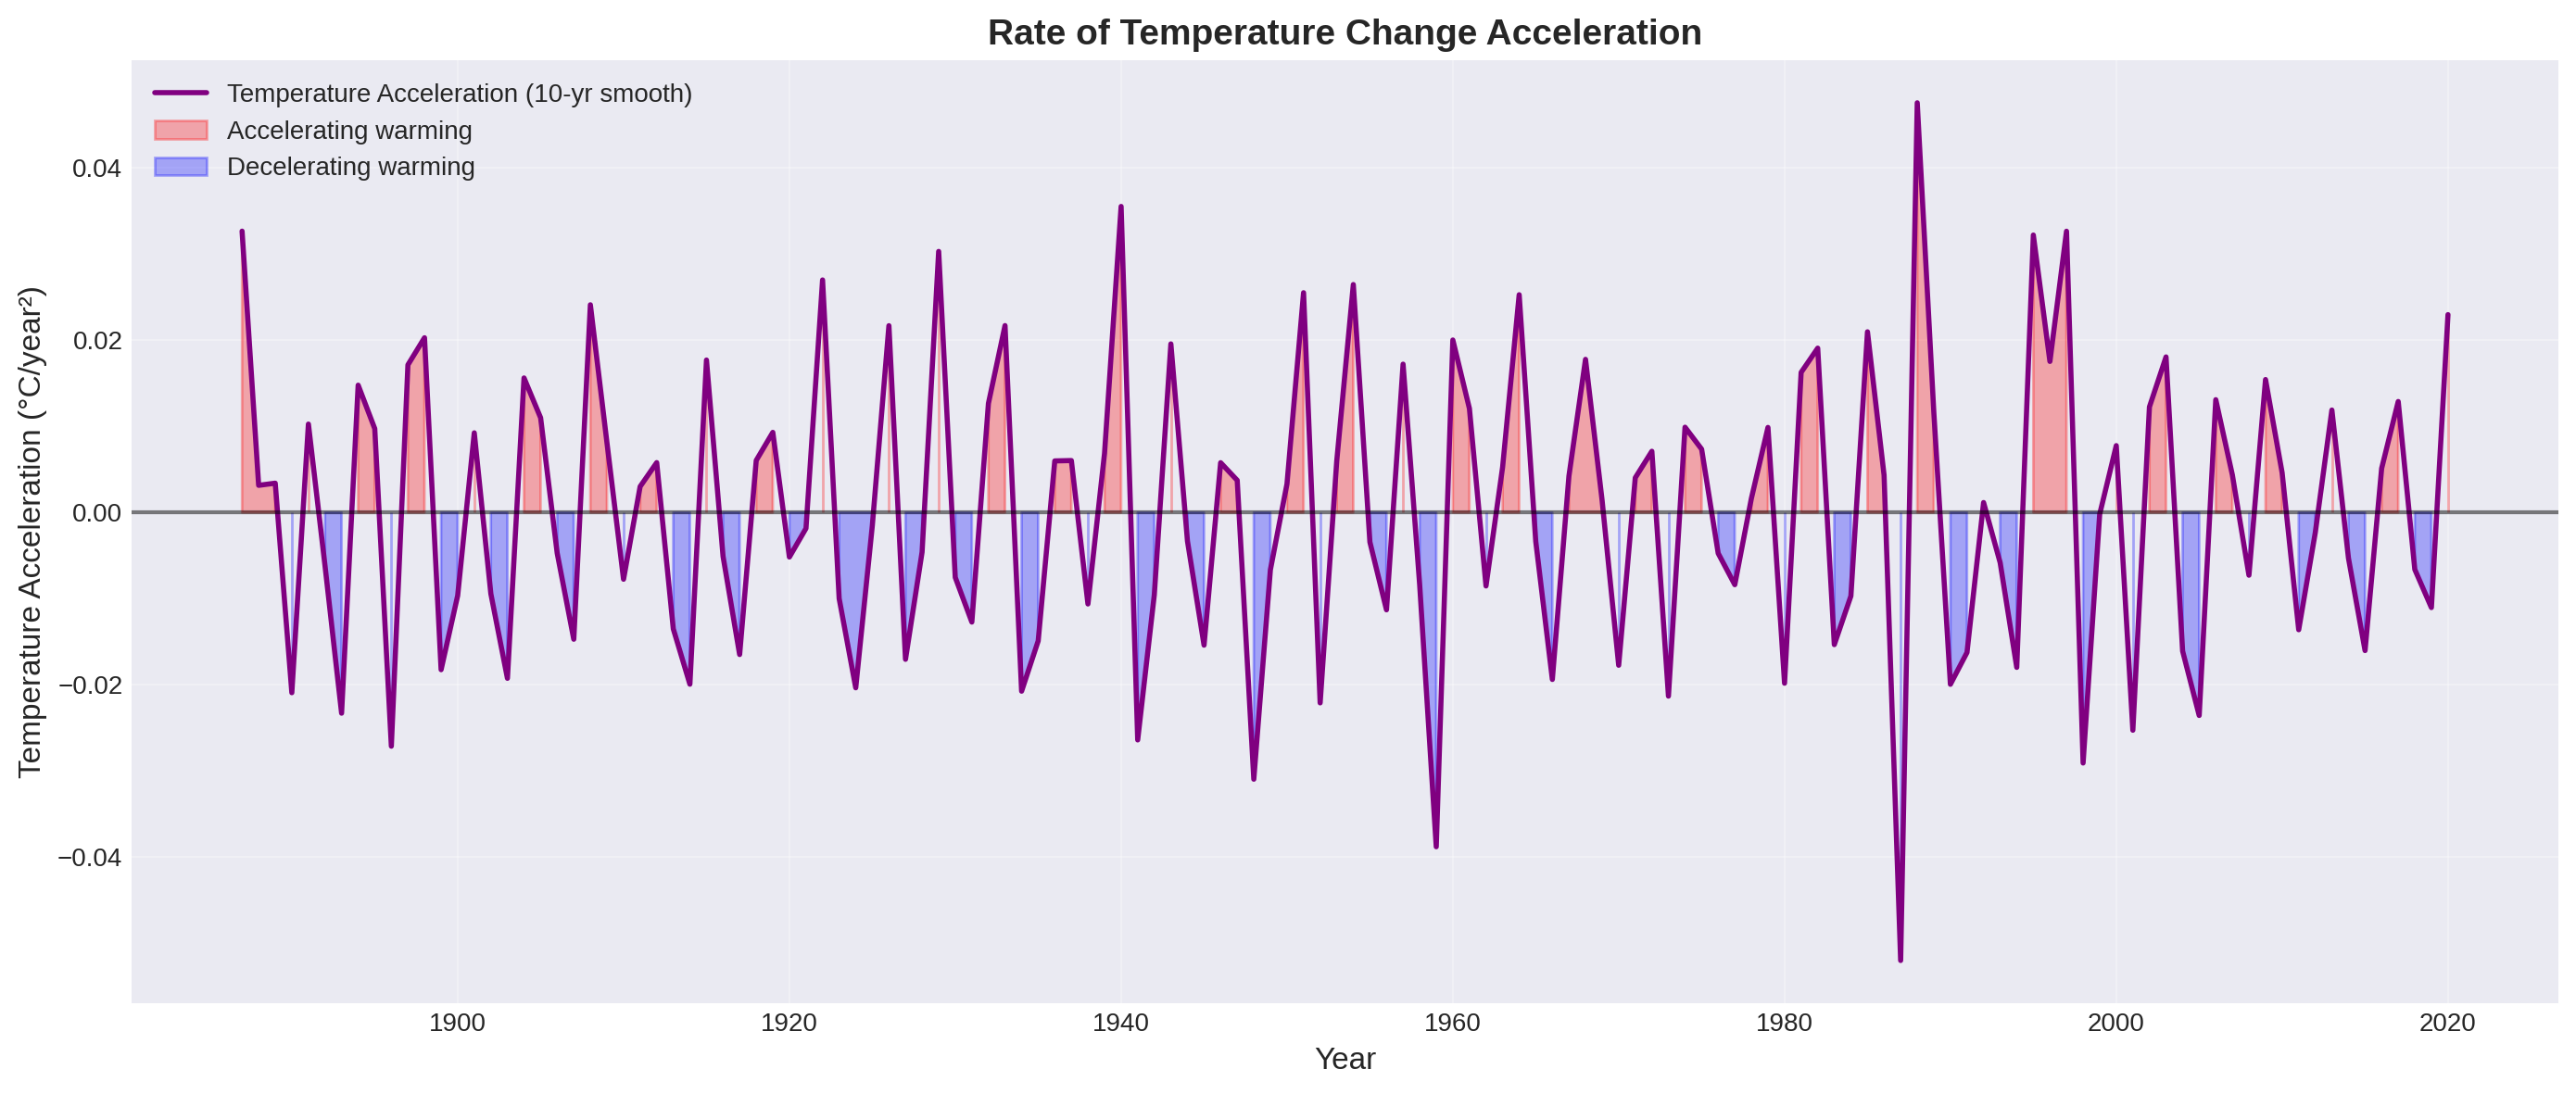

Maximum warming acceleration: 0.0476°C/year² around 1988


In [10]:
# Advanced analysis: Rate of change acceleration
# Calculate year-over-year change
climate_data['Annual_Change'] = climate_data['Temperature_Anomaly'].diff()

# Calculate acceleration (second derivative)
climate_data['Acceleration'] = climate_data['Annual_Change'].diff()

# Smooth for visualization
climate_data['Smoothed_Acceleration'] = climate_data['Acceleration'].rolling(window=10, center=True).mean()

fig, ax = plt.subplots(figsize=(14, 6))

# Plot acceleration
ax.plot(climate_data['Year'], climate_data['Smoothed_Acceleration'],
        color='purple', linewidth=2, label='Temperature Acceleration (10-yr smooth)')

# Fill positive/negative regions
ax.fill_between(climate_data['Year'], 0, climate_data['Smoothed_Acceleration'],
                 where=(climate_data['Smoothed_Acceleration'] > 0),
                 color='red', alpha=0.3, label='Accelerating warming')
ax.fill_between(climate_data['Year'], 0, climate_data['Smoothed_Acceleration'],
                 where=(climate_data['Smoothed_Acceleration'] <= 0),
                 color='blue', alpha=0.3, label='Decelerating warming')

ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Temperature Acceleration (°C/year²)', fontsize=12)
ax.set_title('Rate of Temperature Change Acceleration', fontsize=14, fontweight='bold')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find periods of maximum acceleration
accel_data = climate_data.dropna(subset=['Smoothed_Acceleration'])
max_accel_year = accel_data.loc[accel_data['Smoothed_Acceleration'].idxmax(), 'Year']
max_accel_value = accel_data['Smoothed_Acceleration'].max()

print(f"Maximum warming acceleration: {max_accel_value:.4f}°C/year² around {max_accel_year:.0f}")

## Summary and Key Findings

This climate analysis demonstrates several critical aspects of Earth's temperature record:

### 1. Mathematical Decomposition
- Successfully separated climate signals into natural and anthropogenic components
- Natural variability (solar, ENSO, volcanic) adds complexity but doesn't explain long-term trend
- Anthropogenic signal shows clear acceleration, particularly post-1980

### 2. Statistical Analysis
- Quantified warming trends for different periods
- Demonstrated statistical significance of warming signal
- Identified acceleration in rate of temperature change

### 3. Visualization Techniques
- Time series analysis reveals clear warming trend
- Decadal analysis shows progressive warming
- Component breakdown illustrates dominant anthropogenic influence

### 4. Historical Context
- Connected modern analysis to foundational work by Fourier, Arrhenius, and others
- Demonstrated evolution of climate science understanding

## Applications and Extensions

These methods extend to:

1. **Regional Climate Analysis**: Apply to specific geographic regions
2. **Climate Model Evaluation**: Compare models with observations
3. **Attribution Studies**: Quantify human vs. natural contributions
4. **Impact Assessment**: Link temperature changes to ecological/economic impacts
5. **Future Projections**: Extend trends for scenario planning

## Tools and Resources

### Data Sources
- **NASA GISTEMP**: Global temperature dataset
- **NOAA Climate Data**: Comprehensive climate records
- **Berkeley Earth**: Independent temperature analysis
- **HadCRUT**: UK Met Office global temperature dataset

### Python Libraries for Climate Analysis
- **xarray**: Multi-dimensional climate data
- **cartopy**: Geospatial climate visualization
- **climlab**: Climate modeling toolkit
- **pyClimate**: Statistical climate analysis

### References
1. IPCC (2021). "Climate Change 2021: The Physical Science Basis"
2. Hansen et al. (2010). "Global Surface Temperature Change" Rev. Geophys.
3. Hasselmann (1976). "Stochastic Climate Models" Tellus
4. Foster & Rahmstorf (2011). "Global temperature evolution 1979-2010" Environ. Res. Lett.

### Further Learning
- Explore real climate datasets from NASA or NOAA
- Implement more sophisticated statistical models
- Add spatial analysis with geographic data
- Compare multiple climate model outputs
- Investigate specific climate phenomena in detail